# Data distributions in working memory task

In Sternberg's tasks, the participant pushes a button to respond after doing a memory scanning task. The task requires mentally scanning lists of different lengths to make decision about a new stimulus. Another factor is whether the stimulus was or was not present in the memory set, but we will set that aside for now, to concentrate on how we can use distributions to think about the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

First, we can model the time it takes to just tap a button. This gives us a feeling for what the distribution of response time for the motor component of the task looks like.

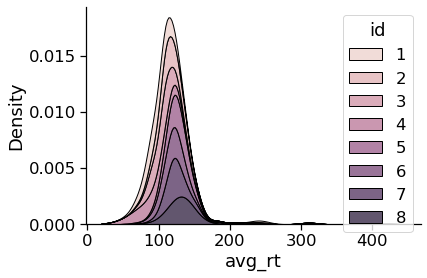

In [7]:
file = '/Users/ethan/Documents/GitHub/OpenSesame/Tap_baseline/pre-pilot3.csv'
df = pd.read_csv(file)
df = df[df['accuracy'] == 100]


rt = df['response_time']
num_participants = int(len(rt)/50)
ids = [x for x in range(1,num_participants+1)]

num_trials = 50
  
p_id =  [x for x in ids for i in range(num_trials)]


data = pd.DataFrame(
    {'id': p_id,
     'avg_rt': rt,
    }) 

sns.set_context("notebook", font_scale=1.5)
sns.kdeplot(data=data, x="avg_rt", hue="id", multiple="stack")
sns.despine()

Think about the difference between a histogram and a kernal density estimate (kde) plot

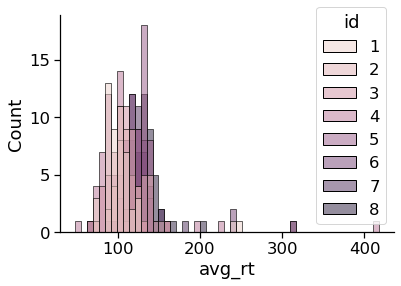

In [8]:
sns.histplot(data=data, x="avg_rt", hue="id")
sns.despine()

Look at the distributions for the motor part of the task, and for the cognitive part of the task. Since the decision part of the task is cognition plus motor, we can also subtract the motor distribution from the data, and get something closer to just the distribution of the cognitive portion of the task. We're ignoring individual differences for now, and lumping all rt's together.

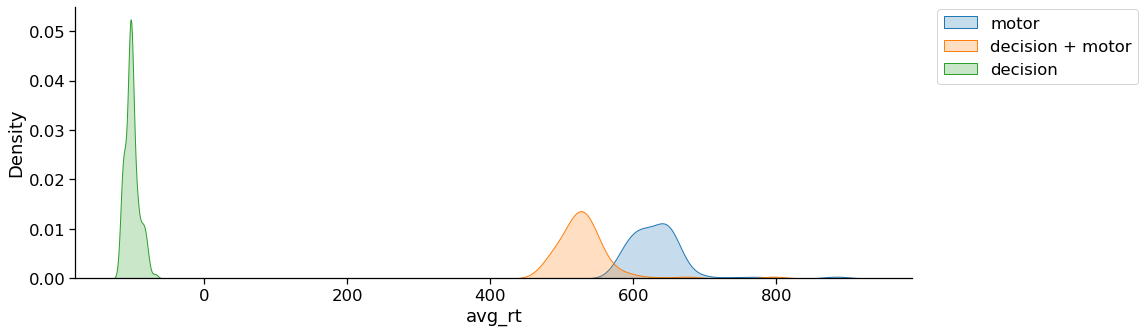

In [10]:
#file1 = '/Users/ethan/Documents/GitHub/OpenSesame/Tap_baseline/pre-pilot3.csv'
#df1 = pd.read_csv(file1)



file2 = '/Users/ethan/Documents/GitHub/OpenSesame/Tap_baseline/decision_pilot1.csv'
df2 = pd.read_csv(file2)


#motor_rt = df1['avg_rt']
motor_rt = rt
decision_rt = df2['avg_rt']


m = ["motor" for x in range(len(motor_rt))]
d = ["decision" for x in range(len(decision_rt))]

rt = motor_rt + decision_rt
task = m + d


data = pd.DataFrame(zip(motor_rt,decision_rt), columns = ['motor', 'decision'])

fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(data = motor_rt, ax=ax, fill=True, label='motor')
sns.kdeplot(data = decision_rt, ax=ax, fill=True, label='decision + motor')
sns.kdeplot(data = decision_rt-motor_rt, ax=ax, fill=True, label='decision')
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
sns.despine()

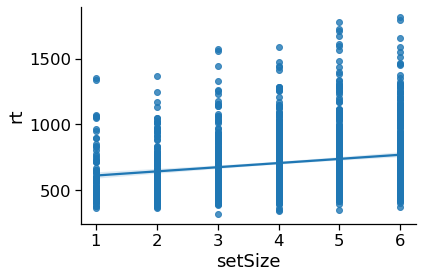

In [11]:
file3 = '/Users/ethan/Documents/GitHub/OpenSesame/Sternberg/data/Sternberg_data_correct.csv'
df3 = pd.read_csv(file3)

sns.regplot(data = df3, x = 'setSize', y = 'rt')
sns.despine()

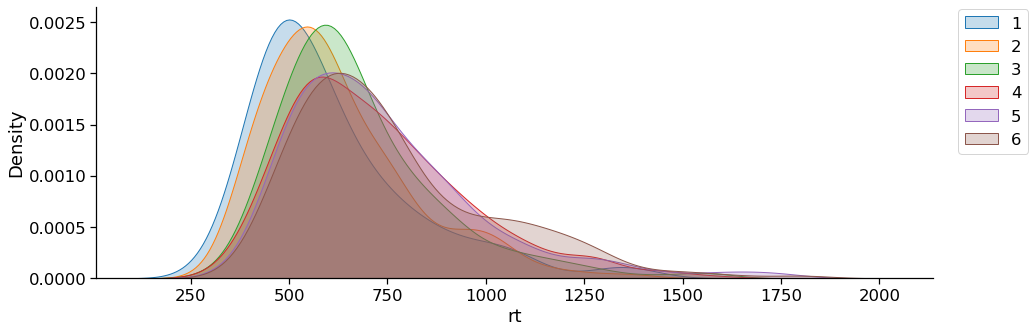

In [171]:
fig, ax = plt.subplots(figsize=(15, 5))

for i in range(1,max(df3['setSize'])+1):
    sns.kdeplot(data = df3.loc[df3['setSize']== i, 'rt'], fill=True, label=str(i))
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')


sns.despine()

#sns.kdeplot(data = df3.loc[df3['setSize']== 1, 'rt'], fill=True, label='1')
#sns.kdeplot(data = df3.loc[df3['setSize']== 2, 'rt'], fill=True, label='2')
#sns.kdeplot(data = df3.loc[df3['setSize']== 3, 'rt'], fill=True, label='3')
#sns.kdeplot(data = df3.loc[df3['setSize']== 4, 'rt'], fill=True, label='4')
#sns.kdeplot(data = df3.loc[df3['setSize']== 5, 'rt'], fill=True, label='5')
#sns.kdeplot(data = df3.loc[df3['setSize']== 6, 'rt'], fill=True, label='6')




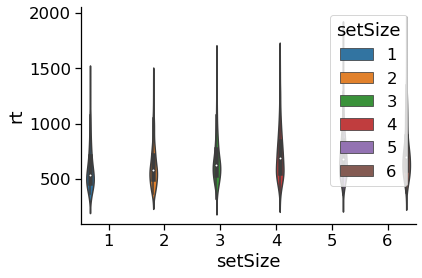

In [198]:



sns.violinplot(data = df3, x = 'setSize', y = 'rt', hue = df3['setSize'])

#sns.kdeplot(data = motor_rt, ax=ax, fill=True, label='motor')

sns.despine()

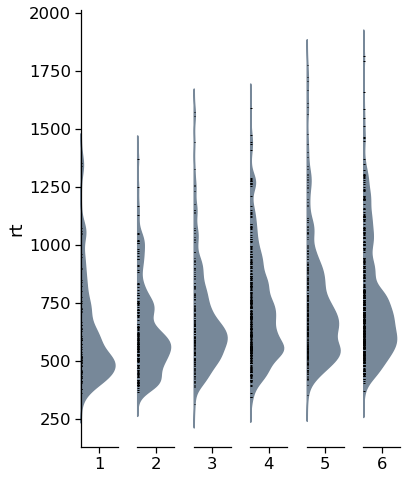

<Figure size 432x288 with 0 Axes>

In [204]:
# function taken from: https://stackoverflow.com/questions/53872439/half-not-split-violin-plots-in-seaborn
def categorical_kde_plot(
    df,
    variable,
    category,
    category_order=None,
    horizontal=False,
    rug=True,
    figsize=None,
):
    """Draw a categorical KDE plot

    Parameters
    ----------
    df: pd.DataFrame
        The data to plot
    variable: str
        The column in the `df` to plot (continuous variable)
    category: str
        The column in the `df` to use for grouping (categorical variable)
    horizontal: bool
        If True, draw density plots horizontally. Otherwise, draw them
        vertically.
    rug: bool
        If True, add also a sns.rugplot.
    figsize: tuple or None
        If None, use default figsize of (7, 1*len(categories))
        If tuple, use that figsize. Given to plt.subplots as an argument.
    """
    if category_order is None:
        categories = list(df[category].unique())
    else:
        categories = category_order[:]

    figsize = (7, 1.0 * len(categories))

    fig, axes = plt.subplots(
        nrows=len(categories) if horizontal else 1,
        ncols=1 if horizontal else len(categories),
        figsize=figsize[::-1] if not horizontal else figsize,
        sharex=horizontal,
        sharey=not horizontal,
    )

    for i, (cat, ax) in enumerate(zip(categories, axes)):
        sns.kdeplot(
            data=df[df[category] == cat],
            x=variable if horizontal else None,
            y=None if horizontal else variable,
            # kde kwargs
            bw_adjust=0.5,
            clip_on=False,
            fill=True,
            alpha=1,
            linewidth=1.5,
            ax=ax,
            color="lightslategray",
        )

        keep_variable_axis = (i == len(fig.axes) - 1) if horizontal else (i == 0)

        if rug:
            sns.rugplot(
                data=df[df[category] == cat],
                x=variable if horizontal else None,
                y=None if horizontal else variable,
                ax=ax,
                color="black",
                height=0.025 if keep_variable_axis else 0.04,
            )

        _format_axis(
            ax,
            cat,
            horizontal,
            keep_variable_axis=keep_variable_axis,
        )

    plt.tight_layout()
    plt.show()


def _format_axis(ax, category, horizontal=False, keep_variable_axis=True):

    # Remove the axis lines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if horizontal:
        ax.set_ylabel(None)
        lim = ax.get_ylim()
        ax.set_yticks([(lim[0] + lim[1]) / 2])
        ax.set_yticklabels([category])
        if not keep_variable_axis:
            ax.get_xaxis().set_visible(False)
            ax.spines["bottom"].set_visible(False)
    else:
        ax.set_xlabel(None)
        lim = ax.get_xlim()
        ax.set_xticks([(lim[0] + lim[1]) / 2])
        ax.set_xticklabels([category])
        if not keep_variable_axis:
            ax.get_yaxis().set_visible(False)
            ax.spines["left"].set_visible(False)


if __name__ == "__main__":
    df = sns.load_dataset("tips")





categorical_kde_plot(
    df3,
    variable='rt',
    category='setSize',
    category_order=[1, 2, 3, 4, 5, 6],
    horizontal=False,
)

sns.despine()

